# Data Collection

In [1]:
import tensorflow as tf
import os
import numpy as np

# Define the folder path where you want to save the data
data_folder = "cifar10_data"

# Create the folder if it doesn't exist
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Save the training data (images and labels)
x_train_save_path = os.path.join(data_folder, "x_train.npy")
y_train_save_path = os.path.join(data_folder, "y_train.npy")

np.save(x_train_save_path, x_train)
np.save(y_train_save_path, y_train)

# Save the testing data (images and labels)
x_test_save_path = os.path.join(data_folder, "x_test.npy")
y_test_save_path = os.path.join(data_folder, "y_test.npy")

np.save(x_test_save_path, x_test)
np.save(y_test_save_path, y_test)

print(f"CIFAR-10 data saved to folder: {data_folder}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10363s 61us/step
CIFAR-10 data saved to folder: cifar10_data


# Data Preprocessing

In [1]:
import tensorflow as tf
import numpy as np
import os

# Define the data folder where CIFAR-10 data is saved
data_folder = "cifar10_data"

# Load the saved CIFAR-10 data
x_train = np.load(os.path.join(data_folder, "x_train.npy"))
y_train = np.load(os.path.join(data_folder, "y_train.npy"))
x_test = np.load(os.path.join(data_folder, "x_test.npy"))
y_test = np.load(os.path.join(data_folder, "y_test.npy"))

# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Define data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

# Apply data augmentation to training data
def augment_images(images, labels):
    return data_augmentation(images), labels

# Prepare the dataset with augmentation for training
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset
    .shuffle(buffer_size=50000)
    .batch(batch_size)
    .map(augment_images, num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)

# Prepare the test dataset without augmentation
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

print("Data preprocessing and augmentation setup completed.")

Data preprocessing and augmentation setup completed.


# Exploratory Data Analysis

C:\Users\ebene\AppData\Local\Temp\ipykernel_10344\2383851758.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = class_names[int(y_train[index])]


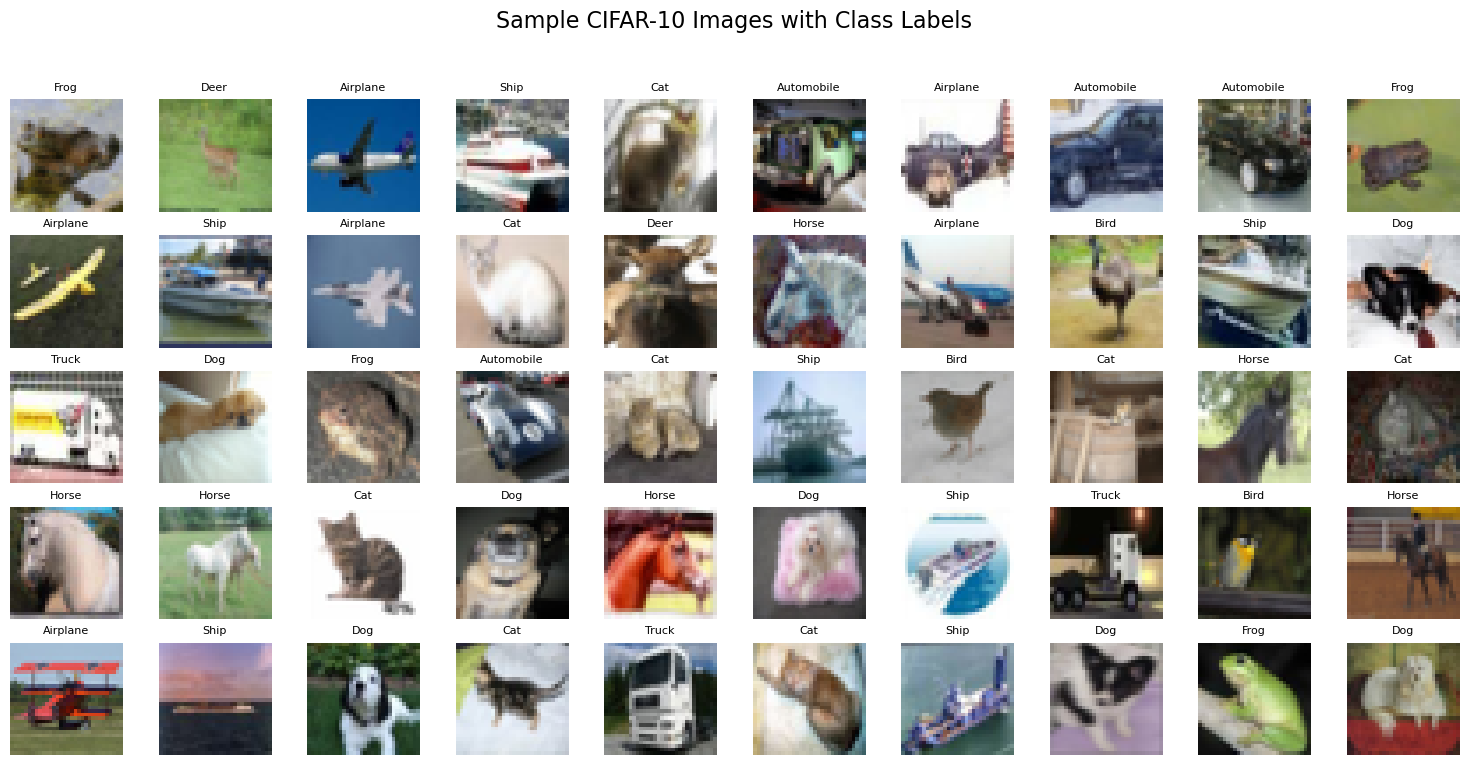

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the CIFAR-10 class names
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Load the saved CIFAR-10 data
data_folder = "cifar10_data"
x_train = np.load(os.path.join(data_folder, "x_train.npy"))
y_train = np.load(os.path.join(data_folder, "y_train.npy"))

# Normalize the images for visualization
x_train = x_train.astype("float32") / 255.0

# Set the number of samples to display
num_samples = 50
rows, cols = 5, 10

# Plot the images in a grid
plt.figure(figsize=(15, 8))
for i in range(num_samples):
    index = np.random.randint(0, x_train.shape[0])
    image = x_train[index]
    label = class_names[int(y_train[index])]
    
    # Display the image and label
    plt.subplot(rows, cols, i + 1)
    plt.imshow(image)
    plt.title(label, fontsize=8)
    plt.axis("off")

plt.suptitle("Sample CIFAR-10 Images with Class Labels", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Model Building

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os

# Load the CIFAR-10 data
data_folder = "cifar10_data"
x_train = np.load(os.path.join(data_folder, "x_train.npy"))
y_train = np.load(os.path.join(data_folder, "y_train.npy"))
x_test = np.load(os.path.join(data_folder, "x_test.npy"))
y_test = np.load(os.path.join(data_folder, "y_test.npy"))

# Normalize the images
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the improved CNN model
def create_improved_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
        
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),
        
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Instantiate the model
improved_model = create_improved_cnn_model()

# Compile the model with an adaptive learning rate scheduler
improved_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss='categorical_crossentropy', metrics=['accuracy'])

# Define data augmentation (apply only to x_train)
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Train the model with augmented data
history = improved_model.fit(
    data_augmentation.flow(x_train, y_train, batch_size=64),  # Augmentation only applied to x_train
    epochs=100,
    validation_data=(x_test, y_test),  # Direct validation on x_test, y_test without augmentation
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the improved model on test data
test_loss, test_accuracy = improved_model.evaluate(x_test, y_test)
print(f"Improved model test accuracy: {test_accuracy:.4f}")

# Save the model if it's performing well
if test_accuracy >= 0.90:
    improved_model.save("high_accuracy_cnn_model.h5")


c:\Users\ebene\anaconda3\envs\Project\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


c:\Users\ebene\anaconda3\envs\Project\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 418s 467ms/step - accuracy: 0.3032 - loss: 2.1843 - val_accuracy: 0.5195 - val_loss: 1.3343 - learning_rate: 0.0010
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 339s 419ms/step - accuracy: 0.5199 - loss: 1.3320 - val_accuracy: 0.5309 - val_loss: 1.4065 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 340s 434ms/step - accuracy: 0.6112 - loss: 1.1033 - val_accuracy: 0.6041 - val_loss: 1.1631 - learning_rate: 0.0010
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 339s 432ms/step - accuracy: 0.6547 - loss: 0.9876 - val_accuracy: 0.7220 - val_loss: 0.8077 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 345s 440ms/step - accuracy: 0.6865 - loss: 0.8997 - val_accuracy: 0.6983 - val_loss: 0.8803 - learning_rate: 0.0010
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 323s 411ms/step - accuracy: 0.7108 - loss: 0.8379 - val_accuracy: 0.7352 - val_loss: 0.7858 - learning_rate: 0.0010
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 324s 413ms/step - accuracy: 0

In [5]:
improved_model.save("image_rec_cnn_model.h5")

# Model Evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step
Test accuracy: 0.8832


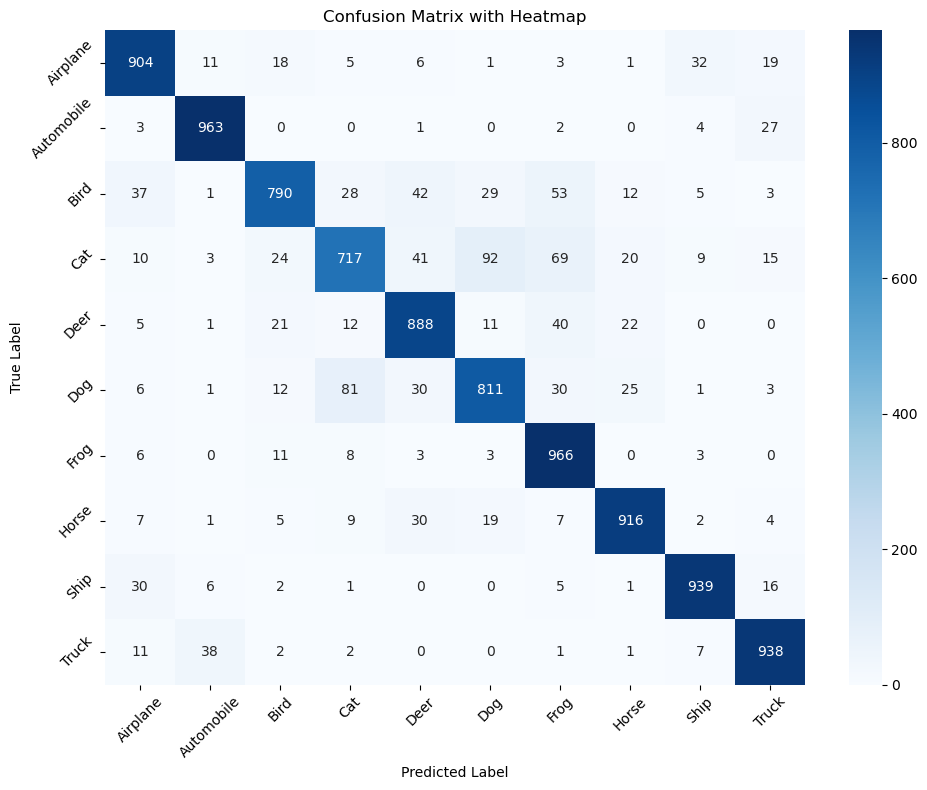

Classification Report:
              precision    recall  f1-score   support

    Airplane       0.89      0.90      0.90      1000
  Automobile       0.94      0.96      0.95      1000
        Bird       0.89      0.79      0.84      1000
         Cat       0.83      0.72      0.77      1000
        Deer       0.85      0.89      0.87      1000
         Dog       0.84      0.81      0.83      1000
        Frog       0.82      0.97      0.89      1000
       Horse       0.92      0.92      0.92      1000
        Ship       0.94      0.94      0.94      1000
       Truck       0.92      0.94      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test data
y_pred = improved_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
test_accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Test accuracy: {test_accuracy:.4f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix with Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

In [10]:
import numpy as np

# Load the large file
x_train = np.load(r'cifar10_data\x_train.npy')

# Split it into smaller chunks and save them
chunk_size = 20000  # Adjust based on size
num_chunks = len(x_train) // chunk_size + 1
for i in range(num_chunks):
    np.save(f'x_train_chunk_{i}.npy', x_train[i*chunk_size:(i+1)*chunk_size])
